## Tutorial 2: 

1. Open Your Terminal or Command Prompt
2. Activate Your Conda Environment
   conda activate MLLab
3. Install Matplotlib
   conda install matplotlib
4. Verify Installation
5.  import matplotlib.pyplot as plt
6.  
    print(plt.matplotlib.__version__)

After installation, it's a good practice to verify that `matplotlib` has been successfully installed. 

This line of code accesses the matplotlib package through the plt object and then prints the version of matplotlib using the __version__ attribute. 
This command imports `matplotlib` and prints its version, confirming the installation was successful.

7. Install statsmodel using:
 pip install statsmodels
 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(plt.matplotlib.__version__)
#%matplotlib inline

3.8.0


Pandas is built on the Numpy package and its key data structure is called the DataFrame. 
DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

Let's create a DataFrame from a dictionary. Here, each key becomes a column in the DataFrame, and the values are the data entries for those columns. A dictionary is a built-in data type that stores collections of data as key-value pairs.

In [45]:
data_example = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

df = pd.DataFrame(data_example)


display the data frame

In [46]:
df


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston
4,Eve,45,Phoenix


#### Select Data
Select 'Name' and 'Age' Columns


In [48]:
df[['Name', 'Age']]


,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40
4,Eve,45


#### Compute Basic Statistics
Compute basic statistics for the numerical columns:

In [49]:
df.describe()


,Age
count,5.000000
mean,35.000000
std,7.905694
min,25.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,45.000000


#### Query the DataFrame
Query the DataFrame for people older than 30:

In [50]:
df[df['Age'] > 30]


,Name,Age,City
2,Charlie,35,Chicago
3,David,40,Houston
4,Eve,45,Phoenix


This example demonstrates the ease of data manipulation with pandas, including creating a DataFrame, selecting specific columns, computing statistics, and filtering data based on conditions. Pandas is an extensive library, supporting a wide range of data manipulation and analysis tasks

#### Communities and Crime Dataset

The dataset used is Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. The attribute to be predicted is (Per Capita Violent Crimes). The variables included in the dataset involve the community, such as the percent of the population considered urban, and the median family income, and involving law enforcement, such as per capita number of police officers, and percent of officers assigned to drug units.

#### attributes.csv contains the column names/names of variables 

In [52]:
attrib = pd.read_csv('/Users/sitani/Documents/HertieSchool/Tutorials/communitiesandcrime/attributes.csv', delim_whitespace = True)

delim_whitespace=True is effectively splitting each line into separate columns based on whitespaces.

Read the communities.data CSV file into a pandas DataFrame and use attrib Dataframe to define the column names of this new DataFrame.

In [55]:
data = pd.read_csv('/Users/sitani/Documents/HertieSchool/Tutorials/communitiesandcrime/communities.data', names = attrib['attributes'])

In [54]:
print(data.shape)

(1994, 128)


This data has 1994 samples and 128 features/variable names

In [59]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


#### Remove non-predictive features

1. state: US state (by number) - not counted as predictive above, but if considered, should be considered nominal (nominal)

2. county: numeric code for county - not predictive, and many missing values (numeric)

3. community: numeric code for community - not predictive and many missing values (numeric)

4. communityname: community name - not predictive - for information only (string)

5. fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

In [61]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [62]:
print(data.shape)

(1994, 123)


Now the data has 123 features

#### Checking for Missing Data
Marking Missing values in the dataset from ? to NaN

In [63]:
data = data.replace('?', np.nan)
data.head()


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [28]:
feat_miss = data.columns[data.isnull().any()]

print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

##### From 122 predictive features, 23 contain missing values.

In [29]:
# Look at the features with missing values

data[feat_miss[0:13]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,1993,319,319,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74,73,54
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,0.72,0,0
freq,129,80,19,81,17,55,23,15,19,12,11,23,72


In [30]:
data[feat_miss[13:23]].describe()

,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319
unique,50,72,30,15,77,63,38,72,3,51
top,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,189,14,48,54,12,27,69,13,126,22


#### Only OtherperCap has 1 missing value, rest have a lot of missing values.
The missing value in feature OtherPerCap will be filled by a mean value using SimpleImputer class from sklearn.

The others features present many missing values, and just for simplicity’s sake, we will remove them from the data set.

The SimpleImputer class provides basic strategies for imputing (filling in) missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

For more info: https://scikit-learn.org/stable/modules/impute.html

In [64]:
from sklearn.impute import SimpleImputer

In [65]:
# Create an instance of SimpleImputer with mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the data and transform the column in one step
data['OtherPerCap'] = imputer.fit_transform(data[['OtherPerCap']])


In [67]:
# data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


Now, the data has 101 features.

### Summary Statistics of a Dataset:


count: The number of non-missing (non-NaN) values.

mean: The mean of the values.

std: The standard deviation of the values.

min: The minimum value.

25%: The 25th percentile (first quartile).

50% (median): The median of the data.

75%: The 75th percentile (third quartile).

max: The maximum value.

In [73]:
data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 To specify percentiles other than the default values 25, 50, 75..

In [75]:
custom_percentiles = data.describe(percentiles=[.20, .40, .60, .80])
print(custom_percentiles)

        population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  1994.000000    1994.000000   1994.000000   1994.000000   1994.000000   
mean      0.057593       0.463395      0.179629      0.753716      0.153681   
std       0.126906       0.163717      0.253442      0.244039      0.208877   
min       0.000000       0.000000      0.000000      0.000000      0.000000   
20%       0.010000       0.340000      0.010000      0.570000      0.030000   
40%       0.010000       0.410000      0.040000      0.770000      0.060000   
50%       0.020000       0.440000      0.060000      0.850000      0.070000   
60%       0.030000       0.470000      0.100000      0.890000      0.100000   
80%       0.070000       0.570000      0.310000      0.960000      0.214000   
max       1.000000       1.000000      1.000000      1.000000      1.000000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24   agePct65up  ...  \
count  1994.000000  1994.000000  1994.000000  1994.

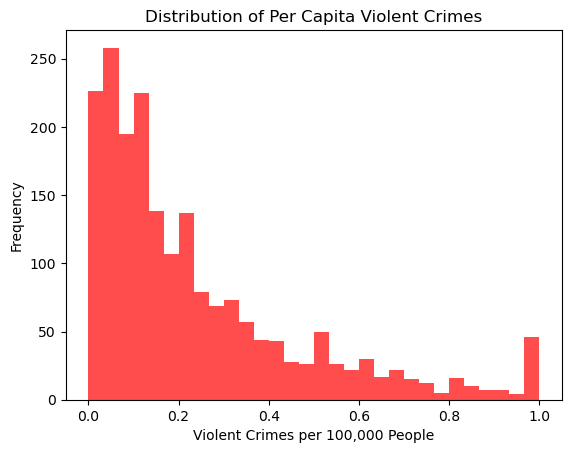

In [135]:
import matplotlib.pyplot as plt

# ViolentCrimesPerPop is the output variable in the dataset
plt.hist(data['ViolentCrimesPerPop'], bins=30, alpha=0.7, color='red')
plt.title('Distribution of Per Capita Violent Crimes')
plt.xlabel('Violent Crimes per 100,000 People')
plt.ylabel('Frequency')
plt.show()


### Splitting the data into training and test sets

In [77]:
X = data.iloc[:, 0:100].values #(data)
y = data.iloc[:, 100].values  #(the attribute/feature to be predicted)

The .iloc attribute in pandas is a powerful indexing method used for integer-location based indexing.
.iloc is part of pandas' and provides a way to access a subset of the data frame's rows and columns.

1. Importing train_test_split Function: The **from sklearn.model_selection import train_test_split** command imports the train_test_split function from scikit-learn,    which is used to split the dataset into training and test sets.

2. Setting the Random Seed: **seed = 0** sets the seed for the random number generator to 0. This ensures that the results are reproducible; anyone running this code with the same dataset and seed will get the same split of data.

3. Splitting the Dataset: **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)** splits the features (X) and the target variable (y) into training and test sets. 30% (test_size = 0.3) of the data is allocated to the test set, while the remaining 70% is used for training the model.
The random_state = seed parameter ensures that the split is reproducible.

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


### Standardization:
Standardization refers to the process of transforming each feature in your data so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of each feature and then dividing by the standard deviation for each feature. The formula used is:

z=(x-μ)/σ
Here, x is the original feature value
μ is the mean of the feature, and 
σ is the standard deviation of the feature.



1. Importing StandardScaler:**from sklearn.preprocessing import StandardScaler** imports the StandardScaler class, which provides the functionality to standardize features.

2. Creating a StandardScaler Instance: **sc = StandardScaler()** creates an instance of StandardScaler. This instance will be used to compute the mean and standard deviation for each feature in the dataset.
   
3. Fitting and Transforming the Training Data: **X_train = sc.fit_transform(X_train)** computes the mean and standard deviation of each feature in the training set X_train, and then standardizes the training set by applying the transformation z=(x-μ)/σ.

  ​The fit_transform method is a combination of fit (to compute the scaling parameters) and transform (to apply the standardization).    The standardized training data is then reassigned to X_train.

4. Transforming the Testing Data: **X_test = sc.transform(X_test)** applies the same transformation to X_test using the mean and standard deviation calculated from the training set. It's crucial to use the parameters from the training set to ensure the model evaluates on the same scale. The standardized test data is reassigned to X_test.


In [80]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression using Least squares

Let's define a function to do this. 

In [116]:
def linear_regression_closed_form(X_train, y_train, X_test=None):
    """
    Performs linear regression using the closed-form solution.

    Parameters:
    - X_train: Training features, numpy array of shape (n_samples, n_features)
    - y_train: Training target, numpy array of shape (n_samples,)
    - X_test: Optional, test features, numpy array of shape (n_samples_test, n_features)

    Returns:
    - beta: Coefficients estimated from the training data
    - predictions: Optional, predictions made on the test data if X_test is provided
    """
    # Add intercept term to training and optionally to test data
    X_train_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    if X_test is not None:
        X_test_with_intercept = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    
    # Calculate coefficients using the closed-form solution
    beta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train
    
    # Make predictions on the test set if provided
    predictions = None
    if X_test is not None:
        predictions = X_test_with_intercept @ beta
    
    return beta, predictions


In [124]:
beta, predictions_closedform = linear_regression_closed_form(X_train, y_train, X_test)

print("Estimated coefficients:", beta)
if predictions is not None:
    print("Predictions on test set:", predictions_closedform)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Estimated coefficients: [ 2.39806452e-01  4.22726596e-02  8.36639107e-03  5.82920998e-02
 -5.75354061e-03 -6.92744759e-03  1.76560641e-02  1.66246299e-02
 -3.68755365e-02 -2.12475477e-02  1.48744899e-02 -5.37112536e-02
  2.39963317e-02 -5.11113071e-02 -2.55903172e-02  8.49162775e-03
 -3.31532024e-02  1.98387109e-02  1.96419110e-02 -1.35824973e-02
  5.70509908e-02  1.66542825e-02 -5.05946361e-02 -2.95488030e-03
 -5.51709047e-03  5.94386637e-03  5.43968871e-03  4.75253849e-03
  7.07002236e-03 -4.63097106e-02 -2.21702178e-02  5.55737811e-03
  6.95037150e-03  2.88369946e-03  5.28086056e-02 -1.97755848e-02
 -8.60213224e-03  2.68676442e-02  2.36996661e-02  6.04341592e-02
  3.66578009e-02 -1.38841609e-02 -4.70915659e-02 -1.86490232e-02
 -3.2086856

In [96]:
# # Add intercept term for closed-form solution
# X_train_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
# X_test_with_intercept = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


In [97]:
# # Closed-form solution
# beta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Calculate Coefficients using Statsmodels

In [125]:
import statsmodels.api as sm

In [126]:
# Add intercept term for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train_sm).fit()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Make Predictions on Test Set

In [127]:
# Predictions using statsmodels
predictions_statsmodels = model.predict(X_test_sm)

Calculate MSE for Both Models


In [128]:
from sklearn.metrics import mean_squared_error

mse_numpy = mean_squared_error(y_test, predictions_closedform)
mse_statsmodels = mean_squared_error(y_test, predictions_statsmodels)

print("MSE for closed-form solution:", mse_numpy)
print("MSE for statsmodels:", mse_statsmodels)


MSE for closed-form solution: 0.019084349346807087
MSE for statsmodels: 0.01908434934680838


Compare the Coefficients

In [103]:
print("Coefficients from closed-form solution:", beta)
print("Coefficients from statsmodels:", model.params)


Coefficients from closed-form solution: [ 2.39806452e-01  4.22726596e-02  8.36639107e-03  5.82920998e-02
 -5.75354061e-03 -6.92744759e-03  1.76560641e-02  1.66246299e-02
 -3.68755365e-02 -2.12475477e-02  1.48744899e-02 -5.37112536e-02
  2.39963317e-02 -5.11113071e-02 -2.55903172e-02  8.49162775e-03
 -3.31532024e-02  1.98387109e-02  1.96419110e-02 -1.35824973e-02
  5.70509908e-02  1.66542825e-02 -5.05946361e-02 -2.95488030e-03
 -5.51709047e-03  5.94386637e-03  5.43968871e-03  4.75253849e-03
  7.07002236e-03 -4.63097106e-02 -2.21702178e-02  5.55737811e-03
  6.95037150e-03  2.88369946e-03  5.28086056e-02 -1.97755848e-02
 -8.60213224e-03  2.68676442e-02  2.36996661e-02  6.04341592e-02
  3.66578009e-02 -1.38841609e-02 -4.70915659e-02 -1.86490232e-02
 -3.20868565e-02 -5.12901241e-02  6.93448381e-03 -1.56858641e-03
  1.54110896e-02 -4.18689092e-02 -1.40766842e-02  2.38882795e-02
 -7.38651245e-03 -6.66178091e-03  2.66576328e-02 -2.36118745e-02
  1.09813871e-02  9.76471006e-03 -7.06385492e-02  

In [129]:
#  beta is from the closed-form solution and coefficients_sm is from statsmodels
difference = beta - model.params  # Make sure both are numpy arrays for direct subtraction
print("Coefficient Differences:", difference)

Coefficient Differences: [ 8.32667268e-17 -9.86849491e-13 -1.65457925e-14 -4.66501837e-14
 -1.14006027e-14  5.54070678e-15 -1.70662096e-14  1.10592091e-13
 -2.84147705e-13  1.68209197e-13  3.61030650e-14  9.13595588e-13
 -9.39873179e-14 -1.36481104e-13  1.06928355e-13 -1.43513673e-14
 -1.26808286e-13  8.32667268e-15 -3.40838469e-14  1.77288739e-14
  2.14522844e-13  5.04943309e-14 -4.72955008e-14 -2.26598254e-15
  7.45931095e-16  3.98032302e-15 -3.28903571e-15  1.22523519e-14
  1.10793319e-13  3.33205685e-14  1.03653197e-13 -1.57318603e-13
 -7.34317121e-14  3.04686831e-14  5.46854229e-14 -1.82839854e-15
  4.19803081e-15  2.00187089e-15  1.89501193e-14  1.72924175e-13
 -3.59573482e-14  2.78976495e-13 -4.71164774e-13  8.24271207e-14
  2.30787611e-13 -2.79408441e-13 -2.70625536e-14 -2.82759927e-15
 -6.93022029e-15 -4.26048086e-15  1.37043155e-14 -3.67761377e-15
 -4.56579219e-15 -1.25299077e-14  1.15324417e-14  4.87110352e-14
 -4.31980840e-14  9.74012537e-14 -1.01002540e-13 -4.54941640e-13


### Visual Comparison

 Line Plot: For a comparison of how each coefficient from the two models aligns, a line plot can be effective.

 plt: we imported matplotlib.pyplot as plt in the beginning. Remember?
 

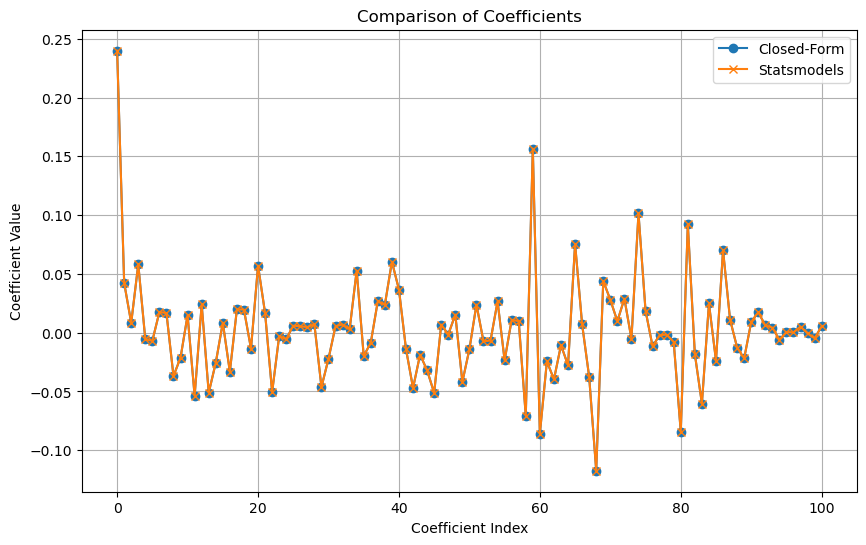

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(beta, label='Closed-Form', marker='o')
plt.plot(model.params, label='Statsmodels', marker='x')
plt.ylabel('Coefficient Value')
plt.xlabel('Coefficient Index')
plt.title('Comparison of Coefficients')
plt.legend()
plt.grid(True)
plt.show()
